In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 150)

# Importing data

In [5]:
loan_df = pd.read_csv('loan.csv')

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
init_rows,init_columns = loan_df.shape

In [8]:
print('Shape of the initial dataframe :')
print(loan_df.shape)

Shape of the initial dataframe :
(39717, 111)


In [9]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
loan_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

# Data cleaning

In [11]:
#checking for the uniqueness of id and member_id column
loan_df.duplicated(subset=['id','member_id'],keep= False).sum()

0

In [12]:
#checking for spelling consistency
print(loan_df['loan_status'].unique())
print (loan_df['verification_status'].unique())
print (loan_df['purpose'].unique())

['Fully Paid' 'Charged Off' 'Current']
['Verified' 'Source Verified' 'Not Verified']
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


No spelling mistake

## check for null values

In [13]:
print('Number of columns with atleast 1 null value :')
print(loan_df.isnull().sum().apply(lambda x : x >0 ).sum())

Number of columns with atleast 1 null value :
68


In [14]:
loan_df.isnull().sum().sort_values(ascending = False)

total_il_high_credit_limit     39717
mo_sin_old_rev_tl_op           39717
bc_util                        39717
bc_open_to_buy                 39717
avg_cur_bal                    39717
acc_open_past_24mths           39717
inq_last_12m                   39717
total_cu_tl                    39717
inq_fi                         39717
total_rev_hi_lim               39717
all_util                       39717
max_bal_bc                     39717
open_rv_24m                    39717
open_rv_12m                    39717
il_util                        39717
total_bal_il                   39717
mths_since_rcnt_il             39717
open_il_24m                    39717
open_il_12m                    39717
open_il_6m                     39717
open_acc_6m                    39717
tot_cur_bal                    39717
tot_coll_amt                   39717
total_bc_limit                 39717
dti_joint                      39717
annual_inc_joint               39717
mths_since_last_major_derog    39717
m

In [15]:
print('Number of columns which have all values as Null :')
print((loan_df.isnull().sum() == init_rows).sum())

Number of columns which have all values as Null :
54


__Dropping the columns with all the values as Null__

In [16]:
loan_df.dropna(axis = 1,how = 'all',inplace = True)

In [17]:
rows1,columns1 = loan_df.shape

In [18]:
print('Shape of dataframe after dropping columns with all values as Null :')
print(loan_df.shape)
print('\nNumber of columns dropped :')
print(init_columns-columns1)

Shape of dataframe after dropping columns with all values as Null :
(39717, 57)

Number of columns dropped :
54


In [19]:
print(round(100*loan_df.isnull().sum().sort_values(ascending = False)/len(loan_df),2))

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
collection_recovery_fee        0.00
acc_now_delinq                 0.00
application_type               0.00
url                            0.00
pymnt_plan                     0.00
loan_status                    0.00
issue_d                        0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
delinq_amnt                    0.00
sub_grade                      0.00
grade                          0.00
installment                 

We can see that columns `next_pymnt_d,mths_since_last_record,mths_since_last_delinq,desc` are columns with high percentage of null values(>60%) and also we can see that the data in these columns will only be avaiable after the applicant has been granded funding. Therefore we can safely drop these columns.

In [20]:
loan_df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis = 1,inplace = True)

In [21]:
print(round(100*loan_df.isnull().sum().sort_values(ascending = False)/len(loan_df),2))

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
sub_grade                     0.00
home_ownership                0.00
addr_state                    0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
zip_code            

The remaining columns have very small percent of null values and these can be cleaned through the next part of analysis

In [22]:
# checking whether some rows have more than 5 missing values
len(loan_df[loan_df.isnull().sum(axis=1) > 5].index)

0

In [23]:
# rechecking the shape of the dataframe
print(loan_df.shape)

(39717, 53)


## Selection of columns for analysis

Since the main goal of analysis of is to identify if a applicant can be defaulter or not, the columns like total_pymnt which are only obtained after granting loan arent really useful for this analysis. Therefore we can drop such columns.

## Business model and assumptions:

The business model of lending corporation is that any borrower can apply for a loan and those loans are santioned based on certain parameters. Investors will choose the borrowers in whom they want to invest and the interest paid by the borrower is earned by the investor. This is the simplied version of their working business model. There are certain things to be noted:
    
    1.Credit score is pulled for every loan applicant and it is main basis to see if a loan can be santioned to the
    applicant
    2. Depending on the credit score each applicant is given a grade from A to G and each grade is again classified 
    into different sub-grades
    3. There is a maximum cap for amount of loan that can be obtained in each grade and if the applied amount is greater
    than the max cap, then grade of loan is appropriately adjusted. There are also other factors which can affect the grade of loan like term of loan,dti,number of open accounts etc.
    4. Interest for loans depends on the grade and sub-grade of the loan, i.e loans which are assumed to of lower risk
    are given a higher grade( from A to G) and higher risk loans are given a lower grade and the interest of the loan increases as we move from higher grade to lower grade (A to G)

### Assumptions:

    - Since interest rate depends on grade of the loan we can consider a very high correlation between those two   
    columns and hence any one of the can be ignored for the analysis
    - Since credit score plays a pivotal role for deciding the base grade of the loan, we can safely assume that 
    those parameters of applicant which are used to calculate the credit score will have high correlation with the grade
    - Generally credit history,debt to credit ratio or revol_util,lenght of credit history are some factors which  affect the credit score

In [24]:
columns_to_be_dropped = ['url','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt']

In [25]:
print(loan_df.pymnt_plan.describe())
print('\n')
print(loan_df.initial_list_status.describe())
print('\n')
print(loan_df.policy_code.describe())
print('\n')
print(loan_df.application_type.describe())
print('\n')
print(loan_df.acc_now_delinq.describe())
print('\n')
print(loan_df.tax_liens.describe())


count     39717
unique        1
top           n
freq      39717
Name: pymnt_plan, dtype: object


count     39717
unique        1
top           f
freq      39717
Name: initial_list_status, dtype: object


count    39717.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64


count          39717
unique             1
top       INDIVIDUAL
freq           39717
Name: application_type, dtype: object


count    39717.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64


count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64


We can see that `pymnt_plan,initial_list_status,policy_code,application_type,acc_now_delinq,tax_liens` the columns have only a single unqiue value, hence no extra information is provived by these columns. Therefore it is safe to remove these columns from the analysis

In [26]:
columns_to_be_dropped = columns_to_be_dropped + ['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','tax_liens']

In [27]:
loan_df.drop(columns_to_be_dropped,axis = 1,inplace = True)

In [28]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
id                      39717 non-null int64
member_id               39717 non-null int64
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_title               37258 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
title                   39706 non-null object
zip_code          

In [29]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,May-16,0.0


## Data fomart correction

Removing percent from int_rate and converting the dtype into float from object.

In [30]:
loan_df.int_rate = loan_df.int_rate.str.replace('%','').apply(pd.to_numeric)

In [31]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
id                      39717 non-null int64
member_id               39717 non-null int64
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null float64
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_title               37258 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
title                   39706 non-null object
zip_code         

# Analysis

In [32]:
loan_df.set_index('id',inplace = True)

In [33]:
print('Status distribution of loans:')
print(loan_df.loan_status.value_counts())

Status distribution of loans:
Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


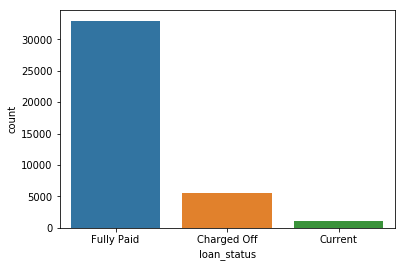

In [34]:
sns.countplot(loan_df.loan_status)

Considering only completed loan applicants for analysis because the current status loans can become either default or non default loans.

In [35]:
# Considering only loans which are not currently active
loan_comp = loan_df[loan_df.loan_status != 'Current']

print('shape of the new dataframe :')
print(loan_comp.shape)
print('*'*60)
print(loan_comp.loan_status.value_counts())
print('*'*60)
print(loan_comp.loan_status.value_counts()/len(loan_comp))

shape of the new dataframe :
(38577, 31)
************************************************************
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64
************************************************************
Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64


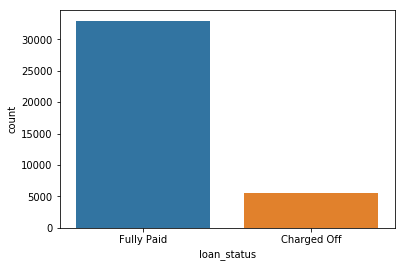

In [36]:
sns.countplot(loan_comp.loan_status)

We can see that about __15%__ of total completed loans are defaulted

### Interest rate

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


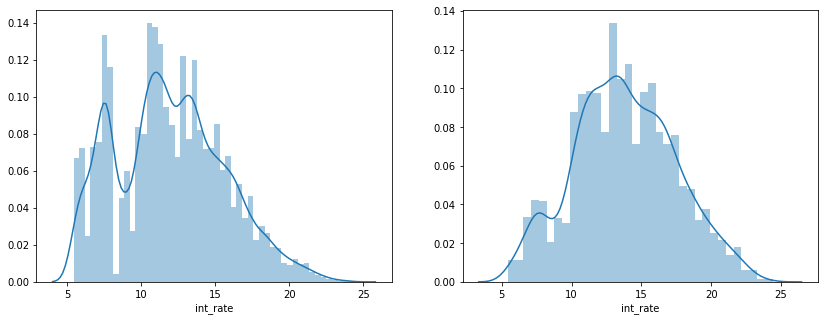

In [37]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(loan_comp.int_rate)
plt.subplot(1,2,2)
sns.distplot(loan_comp[loan_comp['loan_status']=='Charged Off'].int_rate)

We can see that number number of bad loans peaks around 15%(fig 2), but we can also see that the number of loan around 15%(fig 1) is very high when compared to other rates. Therefore we can bucket the interest rate into buckets to gain more insights

In [38]:
pd.cut(loan_comp.int_rate,5).unique()

[(9.216, 13.012], (13.012, 16.808], (5.401, 9.216], (16.808, 20.604], (20.604, 24.4]]
Categories (5, interval[float64]): [(5.401, 9.216] < (9.216, 13.012] < (13.012, 16.808] < (16.808, 20.604] < (20.604, 24.4]]

In [39]:
loan_comp.loc[loan_comp['int_rate']<=9,'int_cat'] = '5-9'
loan_comp.loc[(loan_comp['int_rate']>9)&(loan_comp['int_rate']<=13),'int_cat'] = '9-13'
loan_comp.loc[(loan_comp['int_rate']>13)&(loan_comp['int_rate']<=17),'int_cat'] = '13-17'
loan_comp.loc[(loan_comp['int_rate']>17)&(loan_comp['int_rate']<=21),'int_cat'] = '17-21'
loan_comp.loc[(loan_comp['int_rate']>21),'int_cat'] = '21-25'

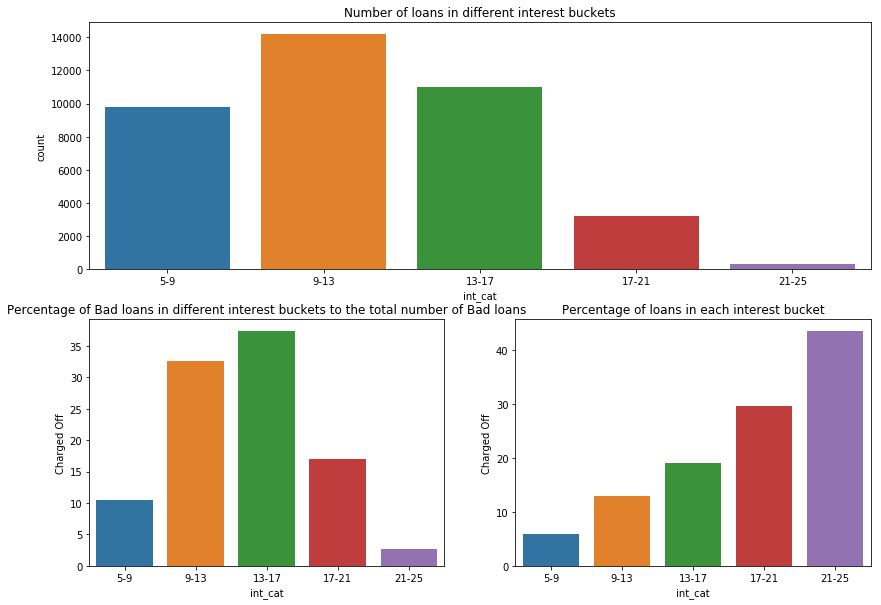

In [40]:
plot_order = ['5-9','9-13','13-17','17-21','21-25']
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans in different interest buckets')
sns.countplot(loan_comp['int_cat'],order = plot_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.int_cat,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('Percentage of Bad loans in different interest buckets to the total number of Bad loans')
sns.barplot(x = plt_df.int_cat,y=plt_df['Charged Off'],order = plot_order)
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.int_cat).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('Percentage of loans in each interest bucket')
sns.barplot(x = plt_df.int_cat,y=plt_df['Charged Off'],order = plot_order)

As seen above we have seen that highest number of bad loans is around medium sized interest bucket. We can see that about(%35) of total bad loans in 13-17 bucket. From plot 3 we can see that percentage of bad loan in each bucket increases as the interest increases. 

## Grade and Sub-Grade

In [41]:
print(loan_comp.groupby('grade')['member_id'].count())
print('*'*60)
print(pd.crosstab(loan_comp.grade,loan_comp.loan_status).transform(lambda x:100*x/x.sum()))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.grade).transform(lambda x:100*x/x.sum()))

grade
A    10045
B    11675
C     7834
D     5085
E     2663
F      976
G      299
Name: member_id, dtype: int64
************************************************************
loan_status  Charged Off  Fully Paid
grade                               
A              10.698418   28.658574
B              25.324329   31.107739
C              23.938155   19.687405
D              19.868491   12.039454
E              12.706593    5.911988
F               5.669095    1.993930
G               1.794917    0.600910
************************************************************
grade                A          B          C          D          E          F  \
loan_status                                                                     
Charged Off   5.993031  12.205567  17.194281  21.986234  26.849418  32.684426   
Fully Paid   94.006969  87.794433  82.805719  78.013766  73.150582  67.315574   

grade                G  
loan_status             
Charged Off  33.779264  
Fully Paid   66.220736  


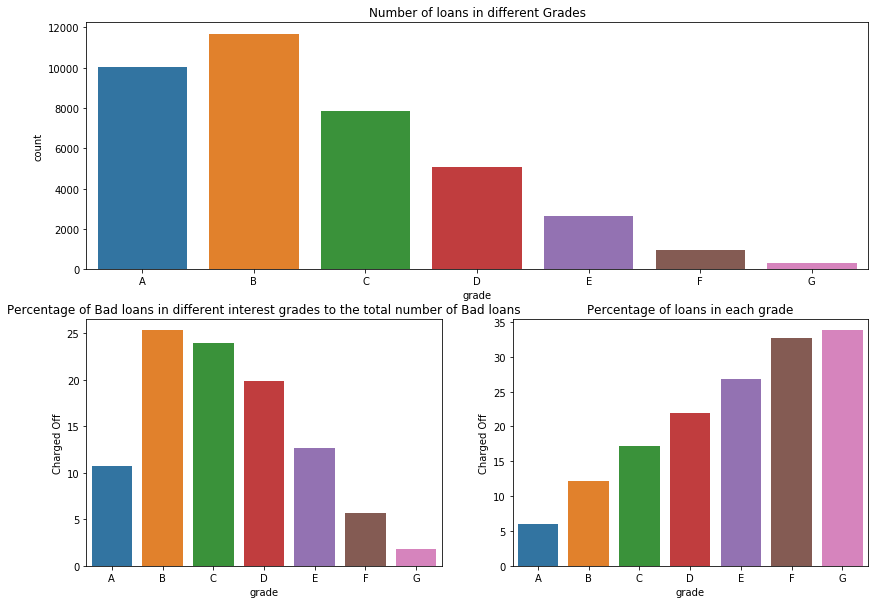

In [42]:
grade_order = ['A','B','C','D','E','F','G']
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans in different Grades')
sns.countplot(loan_comp['grade'],order = grade_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.grade,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('Percentage of Bad loans in different interest grades to the total number of Bad loans')
sns.barplot(x = plt_df.grade,y=plt_df['Charged Off'],order = grade_order)
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.grade).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('Percentage of loans in each grade')
sns.barplot(x = plt_df.grade,y=plt_df['Charged Off'],order = grade_order)

The total number of loans in each grade seems to increase from A to B and therafter decrease consistently. From plot 3 we can see that the percentage of bad loans increases as we move from A to G grades. This seems to be the same trend as the interest rates. 

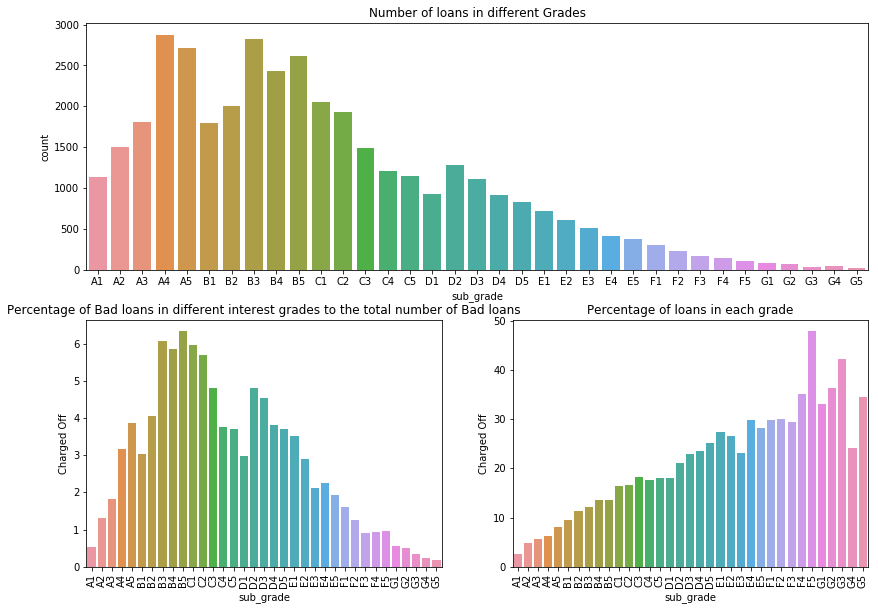

In [43]:
sub_grade_order = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans in different Grades')
sns.countplot(loan_comp['sub_grade'],order = sub_grade_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.sub_grade,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('Percentage of Bad loans in different interest grades to the total number of Bad loans')
sns.barplot(x = plt_df.sub_grade,y=plt_df['Charged Off'],order = sub_grade_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.sub_grade).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('Percentage of loans in each grade')
sns.barplot(x = plt_df.sub_grade,y=plt_df['Charged Off'],order = sub_grade_order)
plt.xticks(rotation = 'vertical')
plt.show()

We can see the same trend in the sub grades as with the grades

In [44]:
pd.crosstab(loan_comp.int_cat,loan_comp.grade).reindex(plot_order)

grade,A,B,C,D,E,F,G
int_cat,,,,,,,
5-9,9621,177,4,4,2,0,0
9-13,424,11498,2159,109,0,0,0
13-17,0,0,5671,4339,991,22,0
17-21,0,0,0,633,1670,757,155
21-25,0,0,0,0,0,197,144


We can see that grade and interest rates are related, we can see that interest of loans increases as the grade of loan changes from A to G. Hence there is a similar pattern of bad loans in both interest rates and grades

### term of loan

In [45]:
print(loan_comp.term.value_counts())
print('*'*60)
print(loan_comp.term.value_counts()/len(loan_comp))

 36 months    29096
 60 months     9481
Name: term, dtype: int64
************************************************************
 36 months    0.754232
 60 months    0.245768
Name: term, dtype: float64


In [46]:
pd.crosstab(loan_comp.loan_status,loan_comp.term).transform(lambda x : x/x.sum())

term,36 months,60 months
loan_status,,
Charged Off,0.110909,0.253138
Fully Paid,0.889091,0.746862


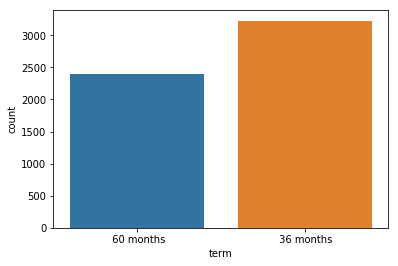

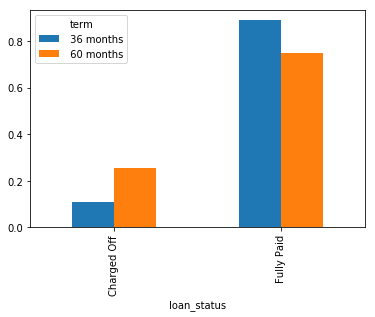

In [47]:
sns.countplot(x= 'term',data = loan_comp[loan_comp['loan_status']=='Charged Off'])
pd.crosstab(loan_comp.loan_status,loan_comp.term).transform(lambda x : x/x.sum()).plot.bar()


### grade vs loan term

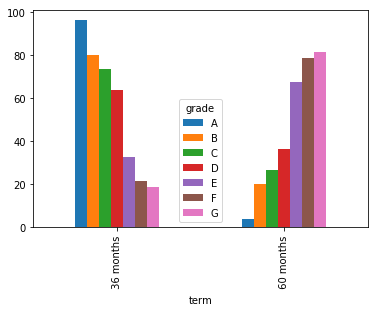

In [48]:
pd.crosstab(loan_comp.term,loan_comp.grade).transform(lambda x : 100*x/x.sum()).plot.bar()
plt.show()

We can see that a large number of loans provided are for a duration of 36 months (about 75%). The percentage of bad loans is higher in 36 months(about 58%) when compared to the 60 months(about 42%). Even though the number of bad loans is higher for 36 months, the tendency of a loan being a bad loan is higher in 60 months tenure. This is due to the reason that the number of loans with 36 month tenure is very high when compared to 60 months. We can also see that loans with higher term tend to fall into lower grade

## Home Ownership

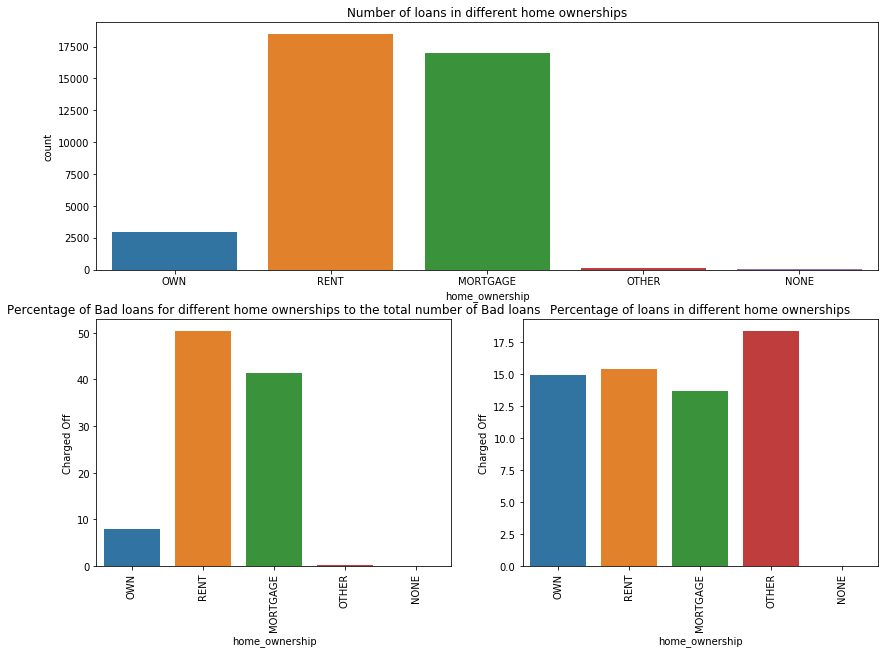

In [49]:
home_order =['OWN', 'RENT', 'MORTGAGE','OTHER','NONE']
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans in different home ownerships')
sns.countplot(loan_comp['home_ownership'],order = home_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.home_ownership,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('Percentage of Bad loans for different home ownerships to the total number of Bad loans')
sns.barplot(x = plt_df.home_ownership,y=plt_df['Charged Off'],order = home_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.home_ownership).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('Percentage of loans in different home ownerships')
sns.barplot(x = plt_df.home_ownership,y=plt_df['Charged Off'],order = home_order)
plt.xticks(rotation = 'vertical')
plt.show()

We can see that maximum percentage of loans are taken for Rent and Mortagage, but if we look at the percentage of bad loans in each category there isnt any significant difference, which can be seen from third plot and there are close to the overall default percentage of 15

### Grade vs Home owernship

In [50]:
pd.crosstab(loan_comp.home_ownership,loan_comp.grade).transform(lambda x : 100*x/x.sum())

grade,A,B,C,D,E,F,G
home_ownership,,,,,,,
MORTGAGE,51.129915,42.852248,40.030636,38.485742,44.123169,48.155738,48.160535
NONE,0.009955,0.017131,0.000000,0.000000,0.000000,0.000000,0.000000
OTHER,0.238925,0.274090,0.204238,0.334317,0.262861,0.204918,0.000000
OWN,8.591339,7.725910,7.390860,7.138643,6.984604,6.250000,7.023411
RENT,40.029866,49.130621,52.374266,54.041298,48.629365,45.389344,44.816054


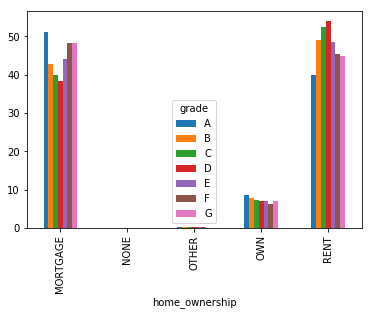

In [51]:
pd.crosstab(loan_comp.home_ownership,loan_comp.grade).transform(lambda x : 100*x/x.sum()).plot.bar()
plt.show()

There is not oberservable trend or correlation between grade and home-ownership

## Verification status

In [52]:
verf_order = ['Verified','Source Verified','Not Verified']
print(loan_comp.groupby('verification_status')['member_id'].count().reindex(verf_order))
print('*'*60)
print(pd.crosstab(loan_comp.verification_status,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(verf_order))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.verification_status).transform(lambda x:100*x/x.sum()))

verification_status
Verified           12206
Source Verified     9677
Not Verified       16694
Name: member_id, dtype: int64
************************************************************
loan_status          Charged Off  Fully Paid
verification_status                         
Verified               36.449262   30.819423
Source Verified        25.484272   25.016692
Not Verified           38.066465   44.163885
************************************************************
verification_status  Not Verified  Source Verified   Verified
loan_status                                                  
Charged Off             12.830957        14.818642  16.803212
Fully Paid              87.169043        85.181358  83.196788


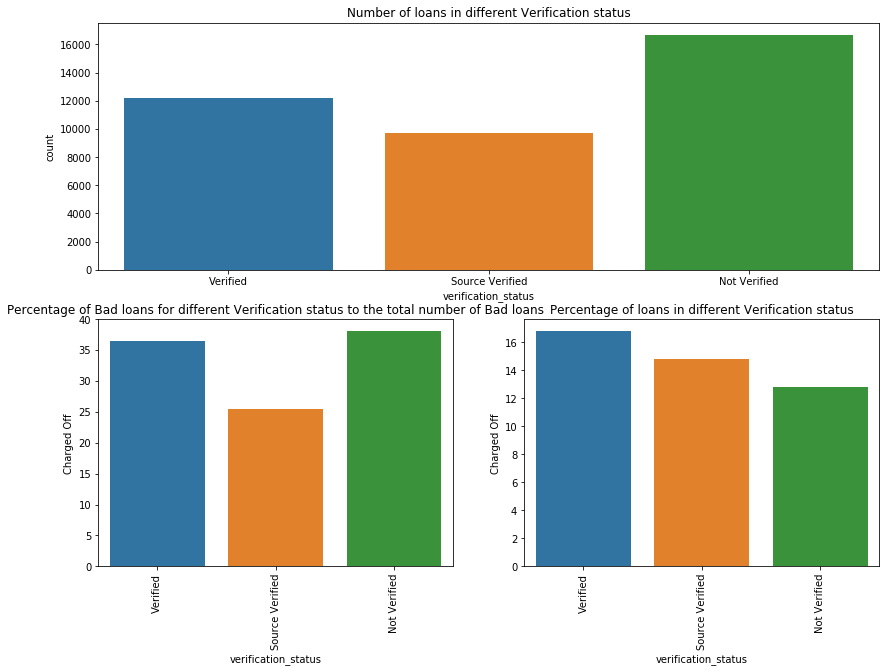

In [53]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans in different Verification status')
sns.countplot(loan_comp['verification_status'],order = verf_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.verification_status,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('Percentage of Bad loans for different Verification status to the total number of Bad loans')
sns.barplot(x = plt_df.verification_status,y=plt_df['Charged Off'],order = verf_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.verification_status).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('Percentage of loans in different Verification status')
sns.barplot(x = plt_df.verification_status,y=plt_df['Charged Off'],order = verf_order)
plt.xticks(rotation = 'vertical')
plt.show()

We can see that income for maximum percentage of loans is Not verified, but if we look at the percentage of bad loans in each category there isnt any significant difference, which can be seen from third plot and since default percentage is around 15%, we can conclude that income verification is not playing an part 

In [54]:
# create new categorical column for number of inquries
loan_comp.loc[loan_comp['verification_status']=='Verified','verf_cat'] = 'Verified'
loan_comp.loc[loan_comp['verification_status']=='Source Verified','verf_cat'] = 'Verified'
loan_comp.loc[loan_comp['verification_status']=='Not Verified','verf_cat'] = 'Not Verified'

In [55]:
print(loan_comp.groupby('verf_cat')['member_id'].count())
print('*'*60)
print(pd.crosstab(loan_comp.verf_cat,loan_comp.loan_status).transform(lambda x:100*x/x.sum()))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.verf_cat).transform(lambda x:100*x/x.sum()))

verf_cat
Not Verified    16694
Verified        21883
Name: member_id, dtype: int64
************************************************************
loan_status   Charged Off  Fully Paid
verf_cat                             
Not Verified    38.066465   44.163885
Verified        61.933535   55.836115
************************************************************
verf_cat     Not Verified   Verified
loan_status                         
Charged Off     12.830957  15.925604
Fully Paid      87.169043  84.074396


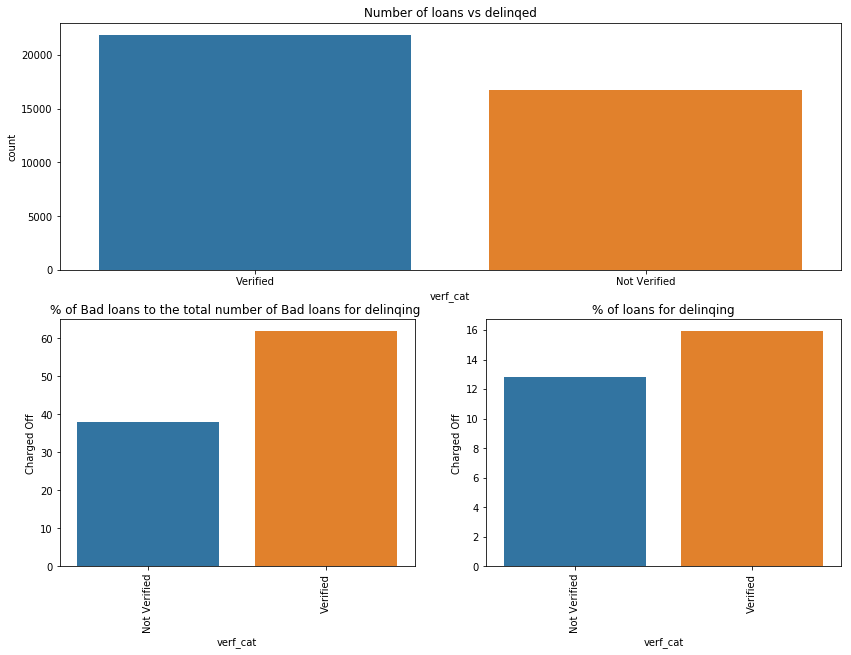

In [56]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans vs delinqed')
sns.countplot(loan_comp['verf_cat'])
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.verf_cat,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for delinqing ')
sns.barplot(x = plt_df.verf_cat,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.verf_cat).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for delinqing')
sns.barplot(x = plt_df.verf_cat,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt.show()

Considering all verified incomes as one category and un verified incomes as a single category doesnt seem to provide any insight. We can see that verified loans have higher percentage of being a bad loan, which doesnt seem to right. Hence there may be other factos which are contributing to this result

### Grade vs Verification status

In [57]:
pd.crosstab(loan_comp.grade,loan_comp.verification_status).transform(lambda x : 100*x/x.sum())

verification_status,Not Verified,Source Verified,Verified
grade,,,
A,30.975201,26.185801,19.170900
B,31.897688,29.647618,28.518761
C,20.588235,19.799525,20.326069
D,11.447227,13.547587,15.262985
E,3.839703,7.316317,10.765197
F,0.994369,2.810788,4.407668
G,0.257578,0.692363,1.548419


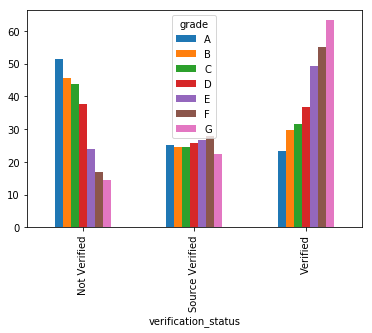

In [58]:
pd.crosstab(loan_comp.verification_status,loan_comp.grade).transform(lambda x : 100*x/x.sum()).plot.bar()
plt.show()

Grade and verification status doesnt seem to have any correlation

## Employment duration

In [59]:
length_order = ['< 1 year', '1 year', '2 years','3 years', '4 years', '5 years', '6 years',  '7 years','8 years', '9 years','10+ years',np.nan]
print(loan_comp.groupby('emp_length')['member_id'].count().reindex(length_order))
print('*'*60)
print(pd.crosstab(loan_comp.emp_length,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(length_order))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.emp_length).transform(lambda x:100*x/x.sum()))

emp_length
< 1 year     4508.0
1 year       3169.0
2 years      4291.0
3 years      4012.0
4 years      3342.0
5 years      3194.0
6 years      2168.0
7 years      1711.0
8 years      1435.0
9 years      1226.0
10+ years    8488.0
NaN             NaN
Name: member_id, dtype: float64
************************************************************
loan_status  Charged Off  Fully Paid
emp_length                          
< 1 year       11.835525   12.036086
1 year          8.446009    8.439882
2 years        10.501945   11.585005
3 years        10.279681   10.754394
4 years         8.557140    8.959403
5 years         8.483052    8.511433
6 years         5.686238    5.789392
7 years         4.871272    4.504589
8 years         3.759956    3.832633
9 years         2.926468    3.322445
10+ years      24.652713   22.264738
NaN                  NaN         NaN
************************************************************
emp_length      1 year  10+ years    2 years  3 years    4 years    5 years  

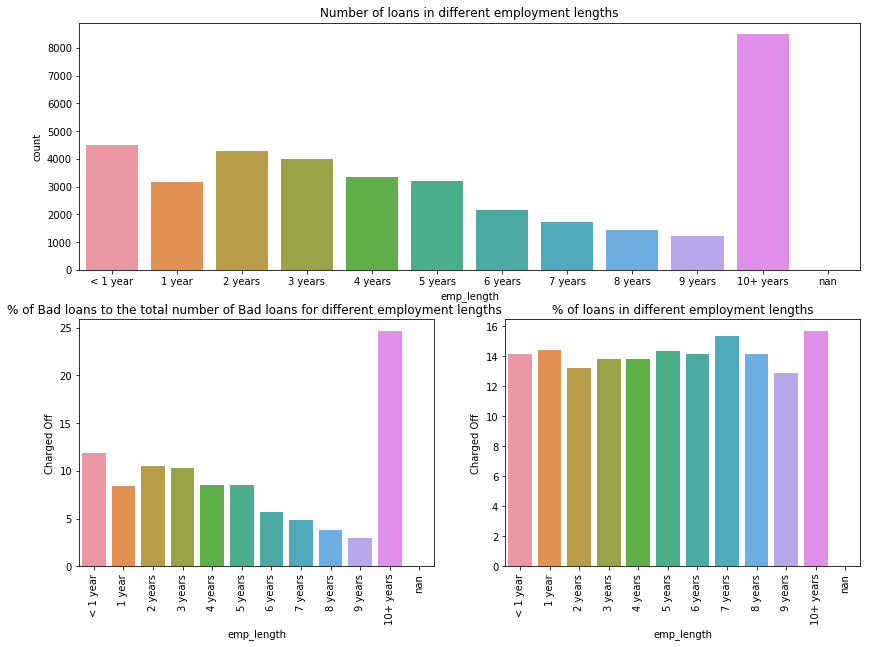

In [60]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans in different employment lengths')
sns.countplot(loan_comp['emp_length'],order = length_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.emp_length,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for different employment lengths ')
sns.barplot(x = plt_df.emp_length,y=plt_df['Charged Off'],order = length_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.emp_length).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans in different employment lengths')
sns.barplot(x = plt_df.emp_length,y=plt_df['Charged Off'],order = length_order)
plt.xticks(rotation = 'vertical')
plt.show()

We can see that majority of loans are santioned to the people with employment of over 10 years, therefore there are large of bad loans in the category. But when we look at the percentage of badloans in each segement there is no noticible trend (as seen in plot 3)

### Grade vs Employment duration

In [61]:
pd.crosstab(loan_comp.grade,loan_comp.emp_length).transform(lambda x : 100*x/x.sum())

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
grade,,,,,,,,,,,
A,23.445882,26.908577,23.747378,25.000000,25.044883,25.860989,26.245387,25.131502,28.153310,27.895595,26.685892
B,31.650363,29.901037,32.346772,30.707876,29.293836,31.559173,29.658672,30.040912,29.059233,29.526917,28.283052
C,22.120543,19.003299,20.251690,21.311067,20.586475,18.659987,20.479705,21.040327,19.442509,19.575856,22.715173
D,13.726728,12.865221,13.493358,13.185444,14.392579,13.462743,13.191882,12.974868,13.379791,12.887439,12.755102
E,6.153361,7.481150,7.247728,6.455633,7.061640,6.950532,7.426199,6.838106,6.341463,7.504078,6.677019
F,2.366677,2.909991,2.353764,2.442672,2.722920,2.817783,2.352399,2.863822,2.857143,1.631321,2.129547
G,0.536447,0.930726,0.559310,0.897308,0.897666,0.688791,0.645756,1.110462,0.766551,0.978793,0.754215


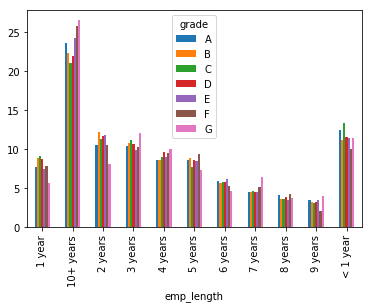

In [62]:
pd.crosstab(loan_comp.emp_length,loan_comp.grade).transform(lambda x : 100*x/x.sum()).plot.bar()
plt.show()

There seems to be no correlation between there two variables

## Number of loan inquries in last 6 months

In [63]:
num_of_inqs = sorted(loan_comp.inq_last_6mths.unique().tolist())

In [64]:
print(loan_comp.groupby('inq_last_6mths')['member_id'].count().reindex(num_of_inqs))
print('*'*60)
print(pd.crosstab(loan_comp.inq_last_6mths,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(num_of_inqs))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.inq_last_6mths).transform(lambda x:100*x/x.sum()))

inq_last_6mths
0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: member_id, dtype: int64
************************************************************
loan_status     Charged Off  Fully Paid
inq_last_6mths                         
0                 40.518927   49.860395
1                 29.802737   27.262519
2                 16.758486   14.297420
3                 11.000533    7.174507
4                  0.906344    0.804249
5                  0.497601    0.352049
6                  0.284343    0.142640
7                  0.177715    0.072838
8                  0.053314    0.033384
************************************************************
inq_last_6mths          0          1          2          3          4  \
loan_status                                                             
Charged Off     12.186648  15.731707  16.678458  20.750922  16.139241   
Fully Paid      87.813352  84.268293  83.321542  79.249078  83.860759   

i

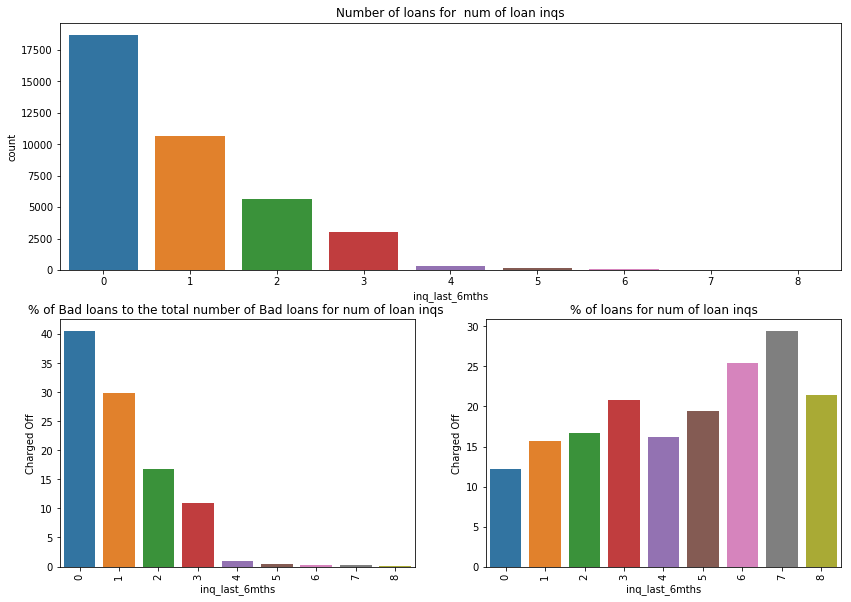

In [65]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans for  num of loan inqs')
sns.countplot(loan_comp['inq_last_6mths'],order = num_of_inqs)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.inq_last_6mths,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for num of loan inqs ')
sns.barplot(x = plt_df.inq_last_6mths,y=plt_df['Charged Off'],order = num_of_inqs)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.inq_last_6mths).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for num of loan inqs')
sns.barplot(x = plt_df.inq_last_6mths,y=plt_df['Charged Off'],order = num_of_inqs)
plt.xticks(rotation = 'vertical')
plt.show()

We can see that as number of loan enquires increases the percentage of bad loans tend to high (from plot 3)

In [66]:
# create new categorical column for number of inquries
loan_comp.loc[loan_comp['inq_last_6mths']==0,'inq_cat'] = '0'
loan_comp.loc[(loan_comp['inq_last_6mths']>=1)&(loan_comp['inq_last_6mths']<=2),'inq_cat'] = '1-2'
loan_comp.loc[(loan_comp['inq_last_6mths']>2)&(loan_comp['inq_last_6mths']<=5),'inq_cat'] = '3-5'
loan_comp.loc[(loan_comp['inq_last_6mths']>5),'inq_cat'] = '6-8'

In [67]:
inq_cat_order = ['0','1-2','3-5','6-8']
print(loan_comp.groupby('inq_cat')['member_id'].count().reindex(inq_cat_order))
print('*'*60)
print(pd.crosstab(loan_comp.inq_cat,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(inq_cat_order))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.inq_cat).transform(lambda x:100*x/x.sum()))

inq_cat
0      18709
1-2    16314
3-5     3443
6-8      111
Name: member_id, dtype: int64
************************************************************
loan_status  Charged Off  Fully Paid
inq_cat                             
0              40.518927   49.860395
1-2            46.561223   41.559939
3-5            12.404478    8.330804
6-8             0.515372    0.248862
************************************************************
inq_cat              0        1-2        3-5        6-8
loan_status                                            
Charged Off  12.186648  16.059826  20.273018  26.126126
Fully Paid   87.813352  83.940174  79.726982  73.873874


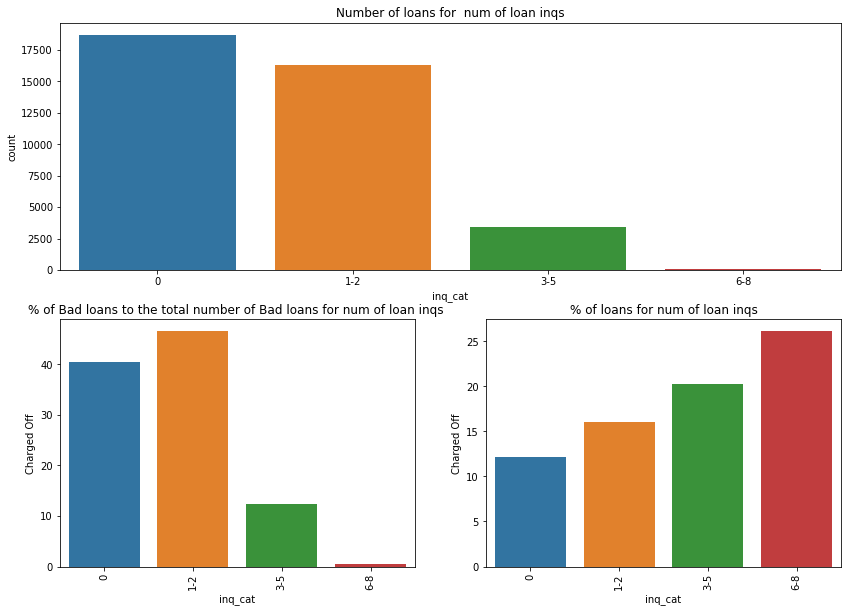

In [68]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans for  num of loan inqs')
sns.countplot(loan_comp['inq_cat'],order = inq_cat_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.inq_cat,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for num of loan inqs ')
sns.barplot(x = plt_df.inq_cat,y=plt_df['Charged Off'],order = inq_cat_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.inq_cat).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for num of loan inqs')
sns.barplot(x = plt_df.inq_cat,y=plt_df['Charged Off'],order = inq_cat_order)
plt.xticks(rotation = 'vertical')
plt.show()

Categorising the number of inquries for loans into 3 buckets, we cans see that default rate increases significantly as the number of inquries increases. If number of inquries are more than 2 then change of loan being a bad loan are substantially high ( from plot 3 )

### Grade vs Num of Inquries

In [69]:
pd.crosstab(loan_comp.grade,loan_comp.inq_cat).transform(lambda x : 100*x/x.sum())

inq_cat,0,1-2,3-5,6-8
grade,,,,
A,31.594420,21.049405,20.214929,3.603604
B,33.080336,27.571411,27.679349,31.531532
C,15.244000,25.021454,24.832994,40.540541
D,11.358170,14.882923,14.928841,16.216216
E,6.045219,7.606963,8.277665,5.405405
F,1.988348,3.021944,3.136799,2.702703
G,0.689508,0.845899,0.929422,0.000000


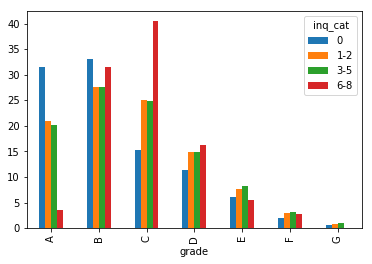

In [70]:
pd.crosstab(loan_comp.grade,loan_comp.inq_cat).transform(lambda x : 100*x/x.sum()).plot.bar()
plt.show()

We can see that majority of requests with loan inquries more then 5 tend we fall less in top grade loans.

## DTI

In [71]:
pd.cut(loan_comp.dti,3).unique()

[(19.993, 29.99], (-0.03, 9.997], (9.997, 19.993]]
Categories (3, interval[float64]): [(-0.03, 9.997] < (9.997, 19.993] < (19.993, 29.99]]

In [72]:
loan_comp.groupby('loan_status').dti.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,14.000624,6.585577,0.0,9.05,14.29,19.29,29.85
Fully Paid,32950.0,13.148421,6.680041,0.0,7.98,13.20,18.39,29.99


In [73]:
# create new categorical column for dti
loan_comp.loc[loan_comp['dti']<=10,'dti_cat'] = 'low'
loan_comp.loc[(loan_comp['dti']>10)&(loan_comp['dti']<=20),'dti_cat'] = 'medium'
loan_comp.loc[(loan_comp['dti']>20),'dti_cat'] = 'high'

In [74]:
dti_cat_order = ['low','medium','high']
print(loan_comp.groupby('dti_cat')['member_id'].count().reindex(dti_cat_order))
print('*'*60)
print(pd.crosstab(loan_comp.dti_cat,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(dti_cat_order))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.dti_cat).transform(lambda x:100*x/x.sum()))

dti_cat
low       12935
medium    18441
high       7201
Name: member_id, dtype: int64
************************************************************
loan_status  Charged Off  Fully Paid
dti_cat                             
low            28.985250   34.306525
medium         49.600142   47.496206
high           21.414608   18.197269
************************************************************
dti_cat           high      low     medium
loan_status                               
Charged Off  16.733787  12.6092  15.134754
Fully Paid   83.266213  87.3908  84.865246


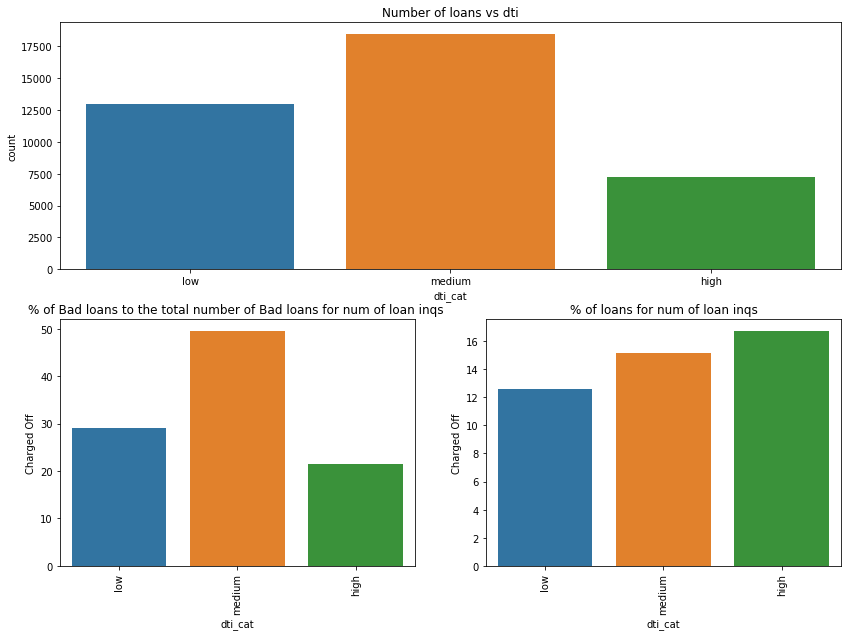

In [75]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans vs dti')
sns.countplot(loan_comp['dti_cat'],order = dti_cat_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.dti_cat,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for num of loan inqs ')
sns.barplot(x = plt_df.dti_cat,y=plt_df['Charged Off'],order = dti_cat_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.dti_cat).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for num of loan inqs')
sns.barplot(x = plt_df.dti_cat,y=plt_df['Charged Off'],order = dti_cat_order)
plt.xticks(rotation = 'vertical')
plt.show()

There seems to be a trend in percentage of bad loans and dti. The higher the dti the higher is the percentage of bad loans. But the difference is not very high (about 1%)

### Grade vs Dti

In [76]:
pd.crosstab(loan_comp.dti_cat,loan_comp.grade).transform(lambda x : 100*x/x.sum())

grade,A,B,C,D,E,F,G
dti_cat,,,,,,,
high,15.410652,18.655246,20.628032,20.314651,21.479534,19.569672,21.070234
low,42.289696,32.702355,29.384733,28.849558,28.013519,26.741803,31.103679
medium,42.299652,48.642398,49.987235,50.835792,50.506947,53.688525,47.826087


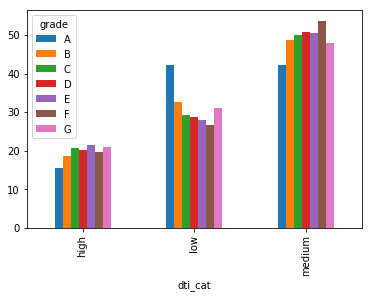

In [77]:
pd.crosstab(loan_comp.dti_cat,loan_comp.grade).transform(lambda x : 100*x/x.sum()).plot.bar()
plt.show()

## Delinquency in last 2 years

In [78]:
# create new categorical column for dti
loan_comp.loc[loan_comp['delinq_2yrs']==0,'is_delinked'] = 'No'
loan_comp.loc[(loan_comp['delinq_2yrs']>0),'is_delinked'] = 'Yes'

In [79]:
print(loan_comp.groupby('is_delinked')['member_id'].count())
print('*'*60)
print(pd.crosstab(loan_comp.is_delinked,loan_comp.loan_status).transform(lambda x:100*x/x.sum()))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.is_delinked).transform(lambda x:100*x/x.sum()))

is_delinked
No     34386
Yes     4191
Name: member_id, dtype: int64
************************************************************
loan_status  Charged Off  Fully Paid
is_delinked                         
No             87.719922   89.377845
Yes            12.280078   10.622155
************************************************************
is_delinked         No        Yes
loan_status                      
Charged Off  14.354679  16.487712
Fully Paid   85.645321  83.512288


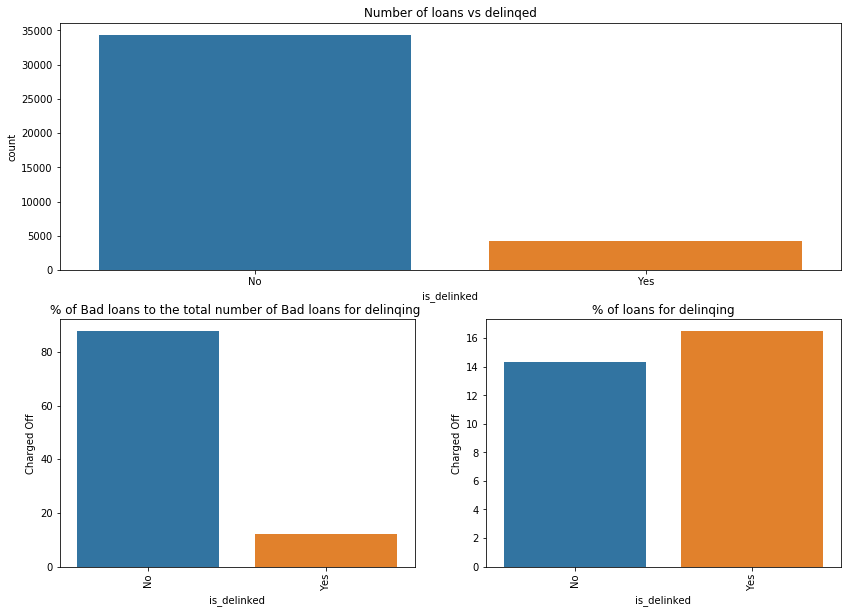

In [80]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans vs delinqed')
sns.countplot(loan_comp['is_delinked'])
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.is_delinked,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for delinqing ')
sns.barplot(x = plt_df.is_delinked,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.is_delinked).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for delinqing')
sns.barplot(x = plt_df.is_delinked,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt.show()

We can see that the person who has delinquence atleast once in last 2 years has more chances being a defaulter again, but the difference in percentage is not very high

## Number of derogatory records

In [81]:
num_of_pub_recs = sorted(loan_comp.pub_rec.unique().tolist())

print(loan_comp.groupby('pub_rec')['member_id'].count().reindex(num_of_pub_recs))
print('*'*60)
print(pd.crosstab(loan_comp.pub_rec,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(num_of_pub_recs))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.pub_rec).transform(lambda x:100*x/x.sum()))


pub_rec
0    36507
1     2013
2       48
3        7
4        2
Name: member_id, dtype: int64
************************************************************
loan_status  Charged Off  Fully Paid
pub_rec                             
0              91.700729   95.135053
1               8.121557    4.722307
2               0.177715    0.115326
3               0.000000    0.021244
4               0.000000    0.006070
************************************************************
pub_rec              0          1          2      3      4
loan_status                                               
Charged Off  14.134276  22.702434  20.833333    0.0    0.0
Fully Paid   85.865724  77.297566  79.166667  100.0  100.0


The number of records with pub_recs more than 1 are very low, hence creating a new categorical variable for pub_rec

In [82]:
# create new categorical column for pub_rec
loan_comp.loc[loan_comp['pub_rec']==0,'is_derog'] = 'No'
loan_comp.loc[(loan_comp['pub_rec']>0),'is_derog'] = 'Yes'

In [83]:
print(loan_comp.groupby('is_derog')['member_id'].count())
print('*'*60)
print(pd.crosstab(loan_comp.is_derog,loan_comp.loan_status).transform(lambda x:100*x/x.sum()))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.is_derog).transform(lambda x:100*x/x.sum()))

is_derog
No     36507
Yes     2070
Name: member_id, dtype: int64
************************************************************
loan_status  Charged Off  Fully Paid
is_derog                            
No             91.700729   95.135053
Yes             8.299271    4.864947
************************************************************
is_derog            No        Yes
loan_status                      
Charged Off  14.134276  22.560386
Fully Paid   85.865724  77.439614


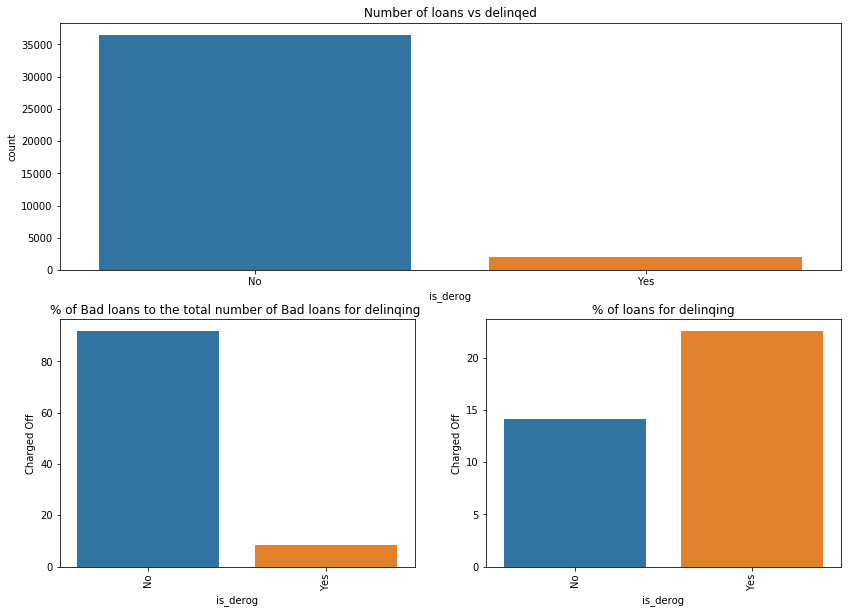

In [84]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans vs delinqed')
sns.countplot(loan_comp['is_derog'])
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.is_derog,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for delinqing ')
sns.barplot(x = plt_df.is_derog,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.is_derog).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for delinqing')
sns.barplot(x = plt_df.is_derog,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt.show()

We can see that if a person has a public derogatory record then the change of him defaulting is significantly higher (about 8%)

### Grade vs Number of derogatory records

In [85]:
pd.crosstab(loan_comp.is_derog,loan_comp.grade).transform(lambda x : 100*x/x.sum())

grade,A,B,C,D,E,F,G
is_derog,,,,,,,
No,98.516675,94.552463,92.443196,92.487709,92.377018,91.393443,91.973244
Yes,1.483325,5.447537,7.556804,7.512291,7.622982,8.606557,8.026756


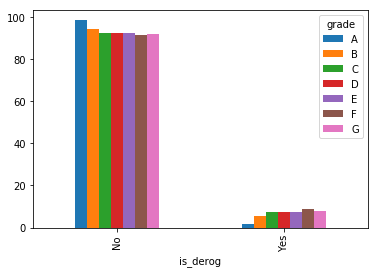

In [86]:
pd.crosstab(loan_comp.is_derog,loan_comp.grade).transform(lambda x : 100*x/x.sum()).plot.bar()
plt.show()

No significant correlation between grade and public derogation records

## Number of records of Bankruptcies

In [87]:
pd.isnull(loan_comp.pub_rec_bankruptcies).sum()
# filling the Nan values with 0
loan_comp.pub_rec_bankruptcies.fillna(0,inplace = True)

In [88]:
num_of_pub_rec_bankruptciess = sorted(loan_comp.pub_rec_bankruptcies.unique().tolist())

print(loan_comp.groupby('pub_rec_bankruptcies')['member_id'].count().reindex(num_of_pub_rec_bankruptciess))
print('*'*60)
print(pd.crosstab(loan_comp.pub_rec_bankruptcies,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(num_of_pub_rec_bankruptciess))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.pub_rec_bankruptcies).transform(lambda x:100*x/x.sum()))

pub_rec_bankruptcies
0.0    36935
1.0     1637
2.0        5
Name: member_id, dtype: int64
************************************************************
loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                     93.460103   96.133536
1.0                      6.504354    3.857360
2.0                      0.035543    0.009105
************************************************************
pub_rec_bankruptcies        0.0        1.0   2.0
loan_status                                     
Charged Off           14.238527  22.357972  40.0
Fully Paid            85.761473  77.642028  60.0


The number of records with pub_rec_bankruptciess more than 1 are very low, hence creating a new categorical variable for pub_rec_bankruptcies

In [89]:
# create new categorical column for pub_rec_bankruptcies
loan_comp.loc[loan_comp['pub_rec_bankruptcies']==0,'is_bankr'] = 'No'
loan_comp.loc[(loan_comp['pub_rec_bankruptcies']>0),'is_bankr'] = 'Yes'

In [90]:
print(loan_comp.groupby('is_bankr')['member_id'].count())
print('*'*60)
print(pd.crosstab(loan_comp.is_bankr,loan_comp.loan_status).transform(lambda x:100*x/x.sum()))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.is_bankr).transform(lambda x:100*x/x.sum()))

is_bankr
No     36935
Yes     1642
Name: member_id, dtype: int64
************************************************************
loan_status  Charged Off  Fully Paid
is_bankr                            
No             93.460103   96.133536
Yes             6.539897    3.866464
************************************************************
is_bankr            No        Yes
loan_status                      
Charged Off  14.238527  22.411693
Fully Paid   85.761473  77.588307


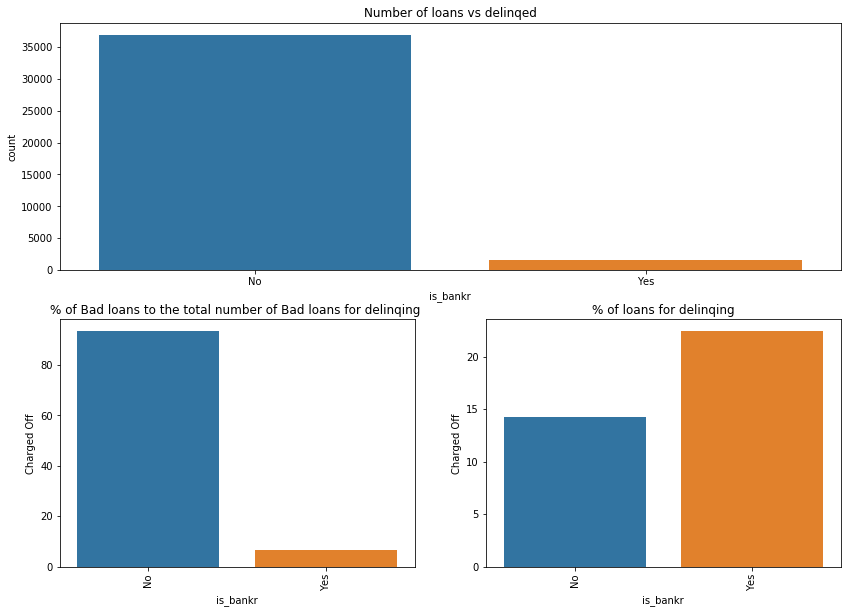

In [91]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans vs delinqed')
sns.countplot(loan_comp['is_bankr'])
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.is_bankr,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for delinqing ')
sns.barplot(x = plt_df.is_bankr,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.is_bankr).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for delinqing')
sns.barplot(x = plt_df.is_bankr,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt.show()

We can see that if a person has a bankruptcy then the change of him defaulting is significantly higher (about 8%)

In [92]:
### Grade vs Bankruptcy

pd.crosstab(loan_comp.is_bankr,loan_comp.grade).transform(lambda x : 100*x/x.sum())

grade,A,B,C,D,E,F,G
is_bankr,,,,,,,
No,98.725734,95.503212,94.128159,94.39528,93.916635,93.442623,93.979933
Yes,1.274266,4.496788,5.871841,5.60472,6.083365,6.557377,6.020067


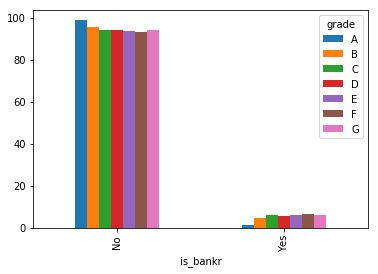

In [93]:
pd.crosstab(loan_comp.is_bankr,loan_comp.grade).transform(lambda x : 100*x/x.sum()).plot.bar()
plt.show()

No significant correlation between grade and Bankruptcy

In [94]:
pd.crosstab(loan_comp.is_derog,loan_comp.is_bankr)

is_bankr,No,Yes
is_derog,,
No,36507,0
Yes,428,1642


We can see that number of bankruptcy records and number of derogatory records are highly correlated as the latter contains the earlier column also

In [95]:

print(loan_comp[loan_comp.is_derog == 'Yes'].groupby('is_bankr')['member_id'].count())
print('*'*60)
print(pd.crosstab(loan_comp[loan_comp.is_derog == 'Yes'].is_bankr,loan_comp[loan_comp.is_derog == 'Yes'].loan_status).transform(lambda x:100*x/x.sum()))
print('*'*60)
print(pd.crosstab(loan_comp[loan_comp.is_derog == 'Yes'].loan_status,loan_comp[loan_comp.is_derog == 'Yes'].is_bankr).transform(lambda x:100*x/x.sum()))

is_bankr
No      428
Yes    1642
Name: member_id, dtype: int64
************************************************************
loan_status  Charged Off  Fully Paid
is_bankr                            
No             21.199143   20.524017
Yes            78.800857   79.475983
************************************************************
is_bankr            No        Yes
loan_status                      
Charged Off  23.130841  22.411693
Fully Paid   76.869159  77.588307


Therefore from the above analysis we can conclude that we can consider pub_rec and ignore pub_rec_bankruptcies

## Number of open credit files

In [96]:
print(loan_comp.open_acc.describe())

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


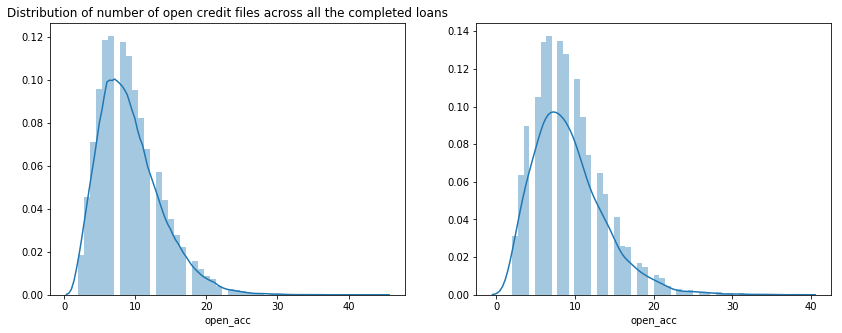

In [97]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Distribution of number of open credit files across all the completed loans')
sns.distplot(loan_comp.open_acc)
plt.subplot(1,2,2)
sns.distplot(loan_comp[loan_comp['loan_status']=='Charged Off'].open_acc)
plt.show()

In [121]:
#6-21 is considered ideal
#Bucketing the number of open credit files
print(pd.cut(loan_comp.open_acc,4).unique())
print(loan_comp.open_acc.quantile(0.9))
loan_comp.loc[loan_comp['open_acc']<=5,'open_acc_cat'] = 'low'
loan_comp.loc[(loan_comp['open_acc']>5)&(loan_comp['open_acc']<=21),'open_acc_cat'] = 'medium'
loan_comp.loc[(loan_comp['open_acc']>21),'open_acc_cat'] = 'high'
#loan_comp.loc[(loan_comp['open_acc']>30)&(loan_comp['dti']<=40),'open_acc_cat'] = '31-40'
#loan_comp.loc[(loan_comp['open_acc']>40),'open_acc_cat'] = '41-50'

[(1.958, 12.5], (12.5, 23.0], (23.0, 33.5], (33.5, 44.0]]
Categories (4, interval[float64]): [(1.958, 12.5] < (12.5, 23.0] < (23.0, 33.5] < (33.5, 44.0]]
15.0


In [123]:
#open_acc_order = ['0-10','11-20','21-30','31-40','41-50']
open_acc_order = ['low','medium','high']
print(loan_comp.groupby('open_acc_cat')['member_id'].count().reindex(open_acc_order))
print('*'*60)
print(pd.crosstab(loan_comp.open_acc_cat,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(open_acc_order))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.open_acc_cat).transform(lambda x:100*x/x.sum()))

open_acc_cat
low        7477
medium    30605
high        495
Name: member_id, dtype: int64
************************************************************
loan_status   Charged Off  Fully Paid
open_acc_cat                         
low             20.863693   19.128983
medium          77.714590   79.611533
high             1.421717    1.259484
************************************************************
open_acc_cat       high        low     medium
loan_status                                  
Charged Off   16.161616  15.701485  14.288515
Fully Paid    83.838384  84.298515  85.711485


In [124]:
loan_comp.groupby

<bound method NDFrame.groupby of          member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000       4975.00000   36 months   
1077430    1314167       2500         2500       2500.00000   60 months   
1077175    1313524       2400         2400       2400.00000   36 months   
1076863    1277178      10000        10000      10000.00000   36 months   
1075269    1311441       5000         5000       5000.00000   36 months   
1069639    1304742       7000         7000       7000.00000   60 months   
1072053    1288686       3000         3000       3000.00000   36 months   
1071795    1306957       5600         5600       5600.00000   60 months   
1071570    1306721       5375         5375       5350.00000   60 months   
1070078    1305201       6500         6500       6500.00000   60 months   
1069908    1305008      12000        12000      12000.00000   36 mo

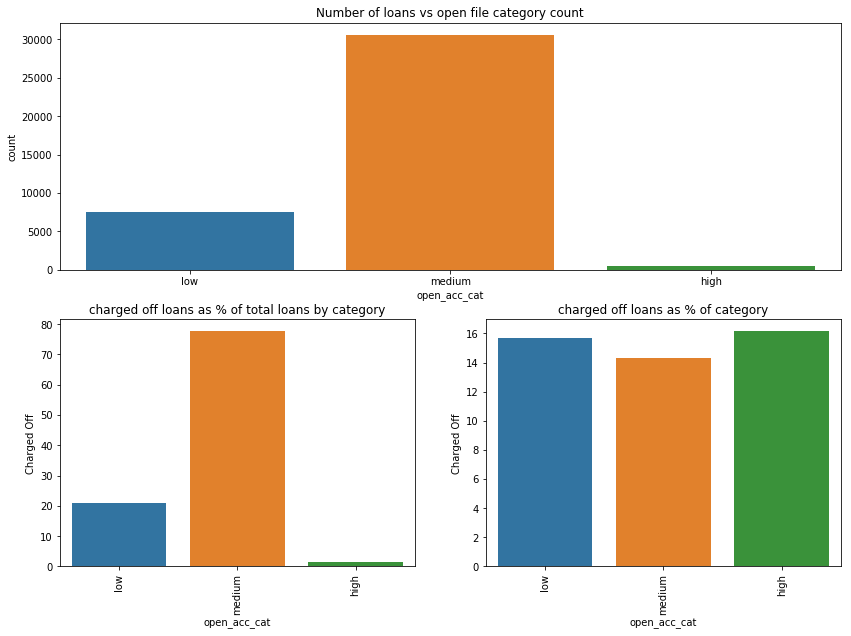

In [125]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans vs open file category count')
sns.countplot(loan_comp['open_acc_cat'],order = open_acc_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.open_acc_cat,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('charged off loans as % of total loans by category')
sns.barplot(x = plt_df.open_acc_cat,y=plt_df['Charged Off'],order = open_acc_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.open_acc_cat).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('charged off loans as % of category')
sns.barplot(x = plt_df.open_acc_cat,y=plt_df['Charged Off'],order = open_acc_order)
plt.xticks(rotation = 'vertical')
plt.show()

We can see that having open accounts less than 6 or more then 21 causes a higher percentage of loans to be defaulted

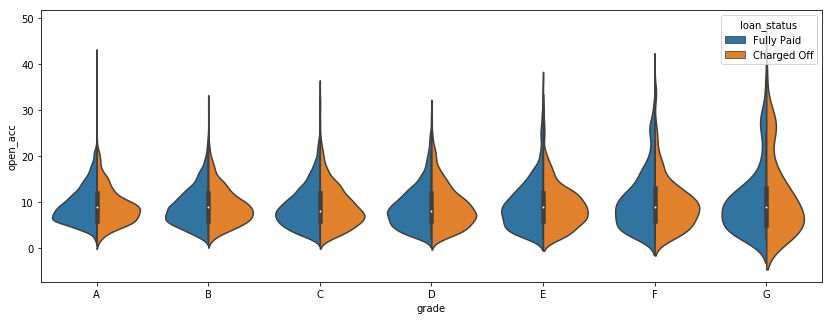

In [102]:
plt.figure(figsize = (14,5))
sns.violinplot(x='grade',y='open_acc',hue = 'loan_status',data=loan_comp,order = grade_order,split = True)

We can also see that accounts with very few or very high open accounts tend to fall into lower grade loans and since they are prone to being bad lonas, the percentage of bad loans is higher in these categories

### Total Credit accounts and Open credit accounts
These two columns can be higher correlated because the person with higher number of total accounts will generally have higher open credit accounts. There to remove the dependency we can take the percentage of open accounts as a metric

In [103]:
loan_comp['percentage_of_open_acc'] = round(100*loan_comp.open_acc/loan_comp.total_acc,2)

In [104]:
loan_comp['percentage_of_open_acc'].describe()

count    38577.000000
mean        47.087340
std         18.664996
min          5.130000
25%         33.330000
50%         44.440000
75%         58.330000
max        175.000000
Name: percentage_of_open_acc, dtype: float64

In [105]:
# ignore this record
loan_comp[loan_comp['percentage_of_open_acc'] > 100]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,int_cat,verf_cat,inq_cat,dti_cat,is_delinked,is_derog,is_bankr,open_acc_cat,percentage_of_open_acc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
127213,85483,2000,2000,1575.0,36 months,7.12,61.87,A,A1,U.S. Government,10+ years,MORTGAGE,118000.0,Not Verified,Sep-07,Fully Paid,debt_consolidation,consolidate debt,020xx,MA,0.43,0,Jun-91,0,14,0,4709,18.50%,8,Apr-10,0.0,5-9,Not Verified,0,low,No,No,No,ideal,175.0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


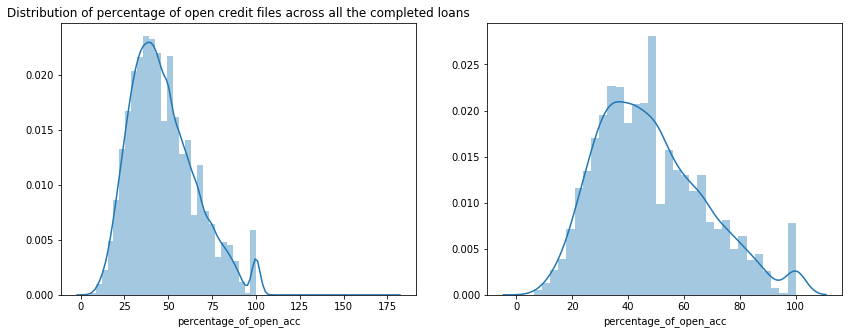

In [106]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Distribution of percentage of open credit files across all the completed loans')
sns.distplot(loan_comp.percentage_of_open_acc)
plt.subplot(1,2,2)
sns.distplot(loan_comp[loan_comp['loan_status']=='Charged Off'].percentage_of_open_acc)
plt.show()

In [107]:
loan_comp.groupby('loan_status').percentage_of_open_acc.mean()

loan_status
Charged Off    48.152899
Fully Paid     46.905370
Name: percentage_of_open_acc, dtype: float64

We can see that mean percentage of open credit accounts for bad and good loans are almost similar with bad loans being slight higher by 2%

## Loan Amount

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


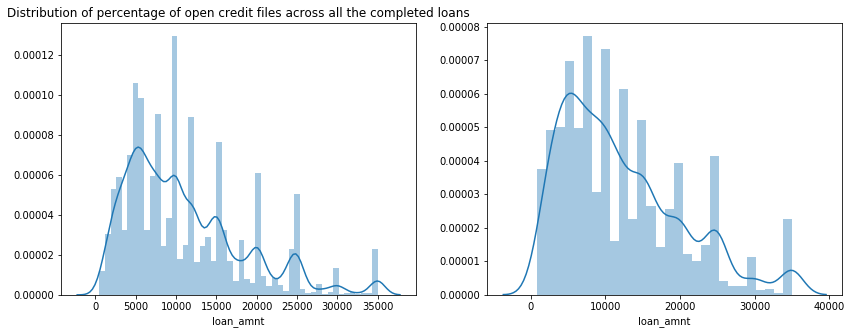

In [108]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Distribution of percentage of open credit files across all the completed loans')
sns.distplot(loan_comp.loan_amnt)
plt.subplot(1,2,2)
sns.distplot(loan_comp[loan_comp['loan_status']=='Charged Off'].loan_amnt)
plt.show()

In [109]:
loan_comp.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [110]:
loan_comp.loc[loan_comp['loan_amnt']<=5000,'loan_amnt_cat'] = '0'
loan_comp.loc[(loan_comp['loan_amnt']>5000)&(loan_comp['loan_amnt']<25000),'loan_amnt_cat'] = '1'
loan_comp.loc[(loan_comp['loan_amnt']>=25000)&(loan_comp['loan_amnt']<30000),'loan_amnt_cat'] = '2'
loan_comp.loc[(loan_comp['loan_amnt']>=30000)&(loan_comp['loan_amnt']<35000),'loan_amnt_cat'] = '3'
loan_comp.loc[(loan_comp['loan_amnt']==35000),'loan_amnt_cat'] = '4'

In [111]:
#open_acc_order = ['0-10','11-20','21-30','31-40','41-50']
loan_amnt_order = ['0','1','2','3','4']
print(loan_comp.groupby('loan_amnt_cat')['member_id'].count().reindex(loan_amnt_order))
print('*'*60)
print(pd.crosstab(loan_comp.loan_amnt_cat,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(loan_amnt_order))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.loan_amnt_cat).transform(lambda x:100*x/x.sum()))

loan_amnt_cat
0     9472
1    26343
2     1690
3      471
4      601
Name: member_id, dtype: int64
************************************************************
loan_status    Charged Off  Fully Paid
loan_amnt_cat                         
0                23.351697   24.758725
1                66.429714   68.603945
2                 5.793496    4.139605
3                 1.759374    1.128983
4                 2.665719    1.368741
************************************************************
loan_amnt_cat          0          1          2          3          4
loan_status                                                         
Charged Off    13.872466  14.189728  19.289941  21.019108  24.958403
Fully Paid     86.127534  85.810272  80.710059  78.980892  75.041597


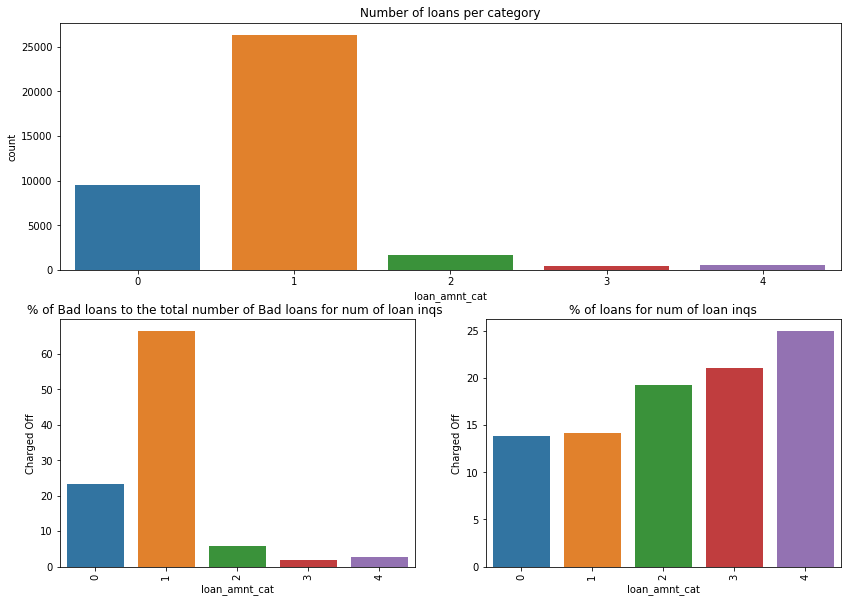

In [112]:

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans per category')
sns.countplot(loan_comp['loan_amnt_cat'],order = loan_amnt_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.loan_amnt_cat,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans ')
sns.barplot(x = plt_df.loan_amnt_cat,y=plt_df['Charged Off'],order = loan_amnt_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.loan_amnt_cat).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans ')
sns.barplot(x = plt_df.loan_amnt_cat,y=plt_df['Charged Off'],order = loan_amnt_order)
plt.xticks(rotation = 'vertical')
plt.show()

We can cleary see a trend that as loan amount increases the tendency of defaulting a loan also increases. This is partly also because of having higher interest rates as we move down the grades

In [113]:
sns.catplot(x='loan_status',y='funded_amnt',col = 'grade',data = loan_comp,kind = 'box',col_order = grade_order)

AttributeError: module 'seaborn' has no attribute 'catplot'

## Annual Income

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Distribution of percentage of open credit files across all the completed loans')
sns.distplot(loan_comp.annual_inc)
plt.subplot(1,2,2)
sns.distplot(loan_comp[loan_comp['loan_status']=='Charged Off'].annual_inc)
plt.show()

In [ ]:
#removing outliers in income
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title('Distribution of percentage of open credit files across all the completed loans')
sns.distplot(loan_comp[loan_comp.annual_inc < loan_comp.annual_inc.quantile(0.95)].annual_inc)
plt.subplot(1,2,2)
sns.distplot(loan_comp[(loan_comp.annual_inc < loan_comp.annual_inc.quantile(0.95))&(loan_comp['loan_status']=='Charged Off')].annual_inc)
plt.show()

In [ ]:
loan_comp.loc[loan_comp['annual_inc']<=20000,'inc_cat'] = 'low'
loan_comp.loc[(loan_comp['annual_inc']>20000)&(loan_comp['annual_inc']<=50000),'inc_cat'] = 'medium'
loan_comp.loc[(loan_comp['annual_inc']>50000)&(loan_comp['annual_inc']<=100000),'inc_cat'] = 'high'
loan_comp.loc[(loan_comp['annual_inc']>100000),'inc_cat'] = 'very_high'

In [ ]:
loan_comp.annual_inc.describe()

In [ ]:
inc_order = ['low','medium','high','very_high']
print(loan_comp.groupby('inc_cat')['member_id'].count().reindex(inc_order))
print('*'*60)
print(pd.crosstab(loan_comp.inc_cat,loan_comp.loan_status).transform(lambda x:100*x/x.sum()).reindex(inc_order))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.inc_cat).transform(lambda x:100*x/x.sum()))

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans vs dti')
sns.countplot(loan_comp['inc_cat'],order = inc_order)
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.inc_cat,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for num of loan inqs ')
sns.barplot(x = plt_df.inc_cat,y=plt_df['Charged Off'],order = inc_order)
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.inc_cat).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for num of loan inqs')
sns.barplot(x = plt_df.inc_cat,y=plt_df['Charged Off'],order = inc_order)
plt.xticks(rotation = 'vertical')
plt.show()

We can see that as income decreases the tendency to default a loan increases

## Purpose

In [114]:
loan_comp.purpose.describe()

count                  38577
unique                    14
top       debt_consolidation
freq                   18055
Name: purpose, dtype: object

In [115]:
loan_comp.purpose.isnull().sum()

0

In [116]:
loan_comp.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [117]:
#inc_order = ['low','medium','high','very_high']
print(loan_comp.groupby('purpose')['member_id'].count())
print('*'*60)
print(pd.crosstab(loan_comp.purpose,loan_comp.loan_status).transform(lambda x:100*x/x.sum()))
print('*'*60)
print(pd.crosstab(loan_comp.loan_status,loan_comp.purpose).transform(lambda x:100*x/x.sum()))

purpose
car                    1499
credit_card            5027
debt_consolidation    18055
educational             325
home_improvement       2875
house                   367
major_purchase         2150
medical                 681
moving                  576
other                  3865
renewable_energy        102
small_business         1754
vacation                375
wedding                 926
Name: member_id, dtype: int64
************************************************************
loan_status         Charged Off  Fully Paid
purpose                                    
car                    2.843433    4.063733
credit_card            9.632131   13.611533
debt_consolidation    49.173627   46.397572
educational            0.995202    0.816388
home_improvement       6.166696    7.672231
house                  1.048516    0.934750
major_purchase         3.945264    5.851290
medical                1.883775    1.745068
moving                 1.634974    1.468892
other                 11.

In [118]:
loan_comp.groupby('purpose').loan_amnt.mean()

purpose
car                    6746.731154
credit_card           11571.414362
debt_consolidation    12503.457491
educational            6810.461538
home_improvement      11308.000000
house                 12753.405995
major_purchase         8072.604651
medical                8122.760646
moving                 6568.012153
other                  7936.416559
renewable_energy       8537.990196
small_business        13365.108324
vacation               5417.600000
wedding                9755.858531
Name: loan_amnt, dtype: float64

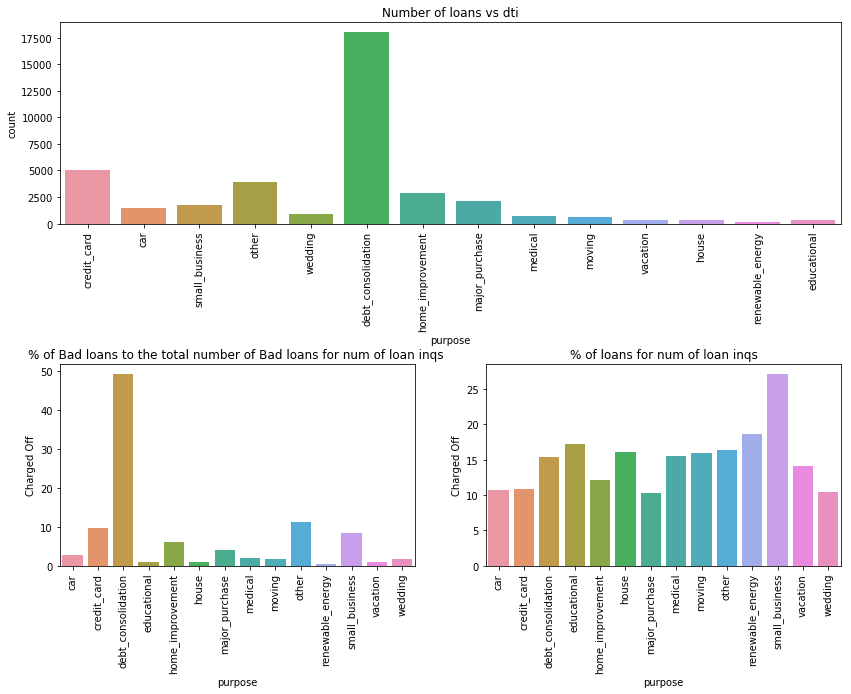

In [119]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.title('Number of loans vs dti')
sns.countplot(loan_comp['purpose'])
plt.xticks(rotation = 'vertical')
plt.subplot(2,2,3)
plt_df = pd.crosstab(loan_comp.purpose,loan_comp.loan_status).transform(lambda x : 100*x/x.sum())['Charged Off'].reset_index()
plt.title('% of Bad loans to the total number of Bad loans for num of loan inqs ')
sns.barplot(x = plt_df.purpose,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt_df = pd.crosstab(loan_comp.loan_status,loan_comp.purpose).transform(lambda x : 100*x/x.sum()).iloc[0,].reset_index()
plt.subplot(2,2,4)
plt.title('% of loans for num of loan inqs')
sns.barplot(x = plt_df.purpose,y=plt_df['Charged Off'])
plt.xticks(rotation = 'vertical')
plt.subplots_adjust(hspace = 0.7)
plt.show()

We can see that majority of loans are for purpose debt_consolidation. the default percentage is highest for small businesses which is about(25%)

# Summary

From the above analysis, we can conclude that- following are the variables which can be used to identify the defaulters:
    
    
#### Number of loan inquries in last 6 months (inq_last_6mths): 
Default rate increases significantly as the number of inquires increases. If number of inquires are more than 2 then change of loan being a bad loan are substantially high.
#### Number of derogatory records(pub_rec): 
if a person has a public derogatory record then the change of him defaulting is significantly higher
#### DTI: 
The higher the dti the higher is the percentage of bad loans. But the difference with in dti range is not very high.
#### Delinquency in last 2 years:  
The person who has delinquent at least once in last 2 years has more chances being a defaulter again, but the difference in percentage between ‘No’ and ‘Yes – is delinquent is not very high. 
#### Number of open credit files: 
We saw that open accounts less than 6 or more then 21 causes a higher percentage of loans to be defaulted.
#### Loan amount: 
We saw clearly saw a trend that as loan amount increases the tendency of defaulting a loan also increases. This is partly also because of having higher interest rates as we move down the grades.
#### Annual income: 
income decreases the tendency to default a loan increases.
#### Purpose: 
majority of loans are for purpose debt_consolidation. the default percentage is highest for small businesses which is about(25%).





